<a href="https://colab.research.google.com/github/joethecoolest/Bai_Tap_AI/blob/main/CNN_4_LOAI_BANH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install bing-image-downloader

In [7]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_xeo')
downloader.download("bánh hỏi",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_hoi')
downloader.download("bánh ướt",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_uot')
downloader.download("bánh da lợn",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_da_lon')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://delightfulplate.com/wp-content/uploads/2017/11/Vietnamese-Crepes-Banh-Xeo-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://vietnamtravelinformation.net/wp-content/uploads/2014/06/vietnam-cuisine-banh-xeo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44

In [9]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_xeo')
downloader.download("bánh hỏi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_hoi')
downloader.download("bánh ướt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_uot')
downloader.download("bánh da lợn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_da_lon')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://delightfulplate.com/wp-content/uploads/2017/11/Vietnamese-Crepes-Banh-Xeo-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://vietnamtravelinformation.net/wp-content/uploads/2014/06/vietnam-cuisine-banh-xeo.

In [10]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=110,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_xeo')
downloader.download("bánh hỏi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_hoi')
downloader.download("bánh ướt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_uot')
downloader.download("bánh da lợn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_da_lon')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 110 Images on Page 1.


[%] Downloading Image #1 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://delightfulplate.com/wp-content/uploads/2017/11/Vietnamese-Crepes-Banh-Xeo-3.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://vietnamtravelinformation.net/wp-content/uploads/2014/06/vietnam-cuisine-banh-xeo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://foodisafourletterword.com/wp-content/uploads/2018/12/Banh_

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 82 images belonging to 4 classes.
Found 140 images belonging to 4 classes.


In [11]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [12]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 82 images belonging to 4 classes.


In [13]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 140 images belonging to 4 classes.


In [42]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [43]:
training_data.class_indices

{'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}

In [44]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [45]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/100
3/3 [==============================] - 22s 8s/step - loss: 8.0291 - accuracy: 0.2805 - val_loss: 1.6583 - val_accuracy: 0.1786
Epoch 2/100
3/3 [==============================] - 19s 8s/step - loss: 1.8218 - accuracy: 0.2683 - val_loss: 1.3765 - val_accuracy: 0.1357
Epoch 3/100
3/3 [==============================] - 19s 7s/step - loss: 1.3815 - accuracy: 0.2805 - val_loss: 1.3757 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 19s 7s/step - loss: 1.3716 - accuracy: 0.3537 - val_loss: 1.3209 - val_accuracy: 0.4214
Epoch 5/100
3/3 [==============================] - 19s 8s/step - loss: 1.3454 - accuracy: 0.3537 - val_loss: 1.1737 - val_accuracy: 0.4429
Epoch 6/100
3/3 [==============================] - 19s 8s/step - loss: 1.2173 - accuracy: 0.3780 - val_loss: 0.9885 - val_accuracy: 0.5286
Epoch 7/100
3/3 [==============================] - 19s 8s/step - loss: 1.1402 - accuracy: 0.4634 - val_loss: 1.2728 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==========

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Sai số kiểm tra là:  0.9668727517127991
Độ chính xác kiểm tra là:  0.8357142806053162


<function matplotlib.pyplot.show>

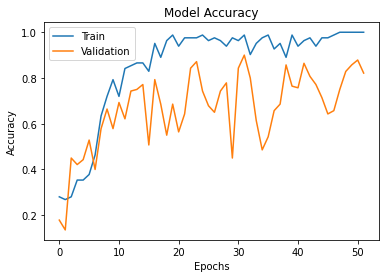

In [46]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [47]:
model.save("CNN_4_loai_banh.h5")

In [48]:
model=load_model('CNN_4_loai_banh.h5')

banh_da_lon


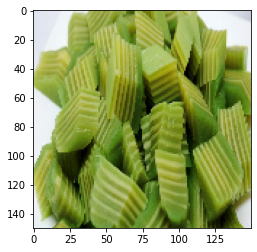

In [55]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_da_lon/bánh da lợn/Image_4.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banh_da_lon'
if round(result[0][1])==1:
  prediction='banh_hoi'
if round(result[0][2])==1:
  prediction='banh_uot'
if round(result[0][3])==1:
  prediction='banh_xeo'
print(prediction)

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_da_lon/bánh da lợn",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banh_xeo'
if round(result[0][1])==1:
  prediction='banh_hoi'
if round(result[0][2])==1:
  prediction='banh_uot'
if round(result[0][3])==1:
  prediction='banh_da_lon'
print(prediction)

In [ ]:
img=load_img("",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banh_xeo'
if round(result[0][1])==1:
  prediction='banh_hoi'
if round(result[0][2])==1:
  prediction='banh_uot'
if round(result[0][3])==1:
  prediction='banh_da_lon'
print(prediction)